>  Hello Everyone, I am beginner in the feild of Data Science and ML. This is My first Visualization notebook. My purpose to creating this to improve my Data visualization skill using python. In this I use Diffrent charts to Visualize Data. Please feel free to point out my mistakes and suggest topics I can read to improve. Thanks! 

# Insights
* Most Dishes of Indian food are **Vegetarian**. Less Than 15% of Dishes are **Non-Vegetarian.**
* Indain People mostly eat spicy food in Main course and Snacks.
* East zone dishes mostly sweet Dishes. In East zone **West Bengal** and **Odisha State** are there.
* More Indian dishes from West Zone. In west zone **Rajasthan, Maharashtra, Gujarat** and **Goa** are there. In this Gujarat state more popular for snack dishes. North Zone Famous for Main Course dishes. 35 dishes of main course come from North zone and also only north zone has starter dishes. In North Zone **Punjab** has more than 30 dishes and aspecially this state famous for their Main Course Dishes. South zone famous for main course or dessert(sweet) dishes.
* In this data, More making time(cooking time + preparation time) is 700 minutes and less making time is 10 minutes.


# Essential Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Lets Look At The Data

In [2]:
df = pd.read_csv("data/indian_food.csv")
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [3]:
df1 = df.dropna() #drop null record

In [4]:
df1.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

# Data anomalies
1. ### **Wrong Value Data**
   In this Data, Many Record Value is **-1**. Replace this value with appropriate value.

* **for Flavor_profile Column**

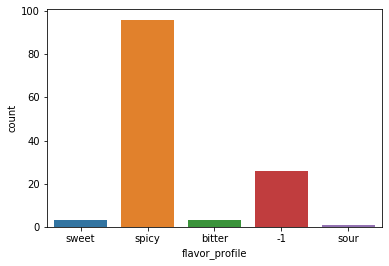

In [5]:
df_dessert = df1[df1.course == "dessert"]
df_maincourse = df[df.course == "main course"]
sns.countplot(df_maincourse["flavor_profile"])

Here Mostly, Main Course is in **Spicy Flavor**. so we replace -1 to splicy for main course Flavor. Also Snack is in **spicy Flavor**.


In [6]:
index_flavor = (df1.loc[df1.flavor_profile == "-1", "course"] == "main course").index
for i in index_flavor:
    if df1.loc[i, "course"] == "main course":
        df1.loc[i, "flavor_profile"] = "spicy"
        
df1.loc[df1.flavor_profile == "-1", "flavor_profile"] = "spicy" 

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


* Neglect Rigion or State column Which have -1 Value.

In [7]:
df2 = df1[df1.state != "-1"]

* for **prep_time and cook_time** Column

In [8]:
time_main = 0
time_cook_main = 0
count = 0
count_cook = 0
for i in range(230):
    try:
        if df2.course[i] == "main course" and df2.prep_time[i] != -1:
            time_main += df2.prep_time[i]
            count += 1
            
        if df2.course[i] == "main course" and df2.cook_time[i] != -1:
            time_cook_main += df2.cook_time[i]
            count_cook += 1
    except:
        pass
mean_main = time_main // count
mean_main_cook = time_cook_main // count_cook
data_prep = df2[df2.prep_time == -1]
data_cook = df2[df2.cook_time == -1]
prep_index = data_prep[data_prep.course == "main course"].index
cook_index = data_cook[data_cook.course == "main course"].index
for i in prep_index:
    df2.prep_time[i] = mean_main
    
for i in cook_index:
    df2.cook_time[i] = mean_main_cook

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
time_dessert = 0
time_cook_dessert = 0
count = 0
count_cook = 0
for i in range(230):
    try:
        if df2.course[i] == "dessert" and df2.prep_time[i] != -1:
            time_dessert += df2.prep_time[i]
            count += 1
            
        if df2.course[i] == "dessert" and df2.cook_time[i] != -1:
            time_cook_dessert += df2.cook_time[i]
            count_cook += 1
    except:
        pass
mean_dessert = time_dessert // count
mean_cook_dessert = time_cook_dessert // count_cook
prep_index_dessert = data_prep[data_prep.course == "dessert"].index
cook_index_dessert = data_cook[data_cook.course == "dessert"].index
for i in prep_index_dessert:
    df2.prep_time[i] = mean_dessert
    
for i in cook_index_dessert:
    df2.cook_time[i] = mean_cook_dessert

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
time_snack = 0
time_cook_snack = 0
count = 0
count_cook = 0
for i in range(230):
    try:
        if df2.course[i] == "snack" and df2.prep_time[i] != -1:
            time_snack += df2.prep_time[i]
            count += 1
            
        if df2.course[i] == "snack" and df2.cook_time[i] != -1:
            time_cook_snack += df2.cook_time[i]
            count_cook += 1
    except:
        pass
mean_snack = time_snack // count
mean_cook_snack = time_cook_snack // count_cook

prep_index_snack = data_prep[data_prep.course == "snack"].index
cook_index_snack = data_cook[data_cook.course == "snack"].index
for i in prep_index_snack:
    df2.prep_time[i] = mean_snack
    
for i in cook_index_snack:
    df2.cook_time[i] = mean_cook_snack

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Add Additional Features
1. Total Time of dish complete

In [11]:
df2['Total_Time'] = df2.prep_time + df2.cook_time

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2. Total Ingradiants. 

In [12]:
for i in range(max(df2.index) + 1):
    try:
        df2.ingredients[i] = df2.ingredients[i].split(",")
    except:
        pass
    
df3 = df2.copy()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df3["len_ingediant"] = len(df3.ingredients)
for i in range(max(df3.index) + 1):
    try:
        df3['len_ingediant'][i] = len(df3.ingredients[i])
    except:
        pass
df3.head()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Total_Time,len_ingediant
0,Balu shahi,"[Maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East,70,4
1,Boondi,"[Gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West,110,3
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, rai...",vegetarian,15,60,sweet,dessert,Punjab,North,75,6
3,Ghevar,"[Flour, ghee, kewra, milk, clarified butte...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,10
4,Gulab jamun,"[Milk powder, plain flour, baking powder, g...",vegetarian,15,40,sweet,dessert,West Bengal,East,55,8


# Exploratory Data Analysis

## 1. Diet
* Diet is Nominal Categorical Variable - Vegetarian and Non-Vegetarian
* Vegetarian dishes is More than Non-Vegetarian dishes. 
* 87.4 percent dishes are vegetarian and 12.6 percent dishes are Non-vegetarian.

Text(0.5, 1.0, 'Distribution of Diet Catagories')

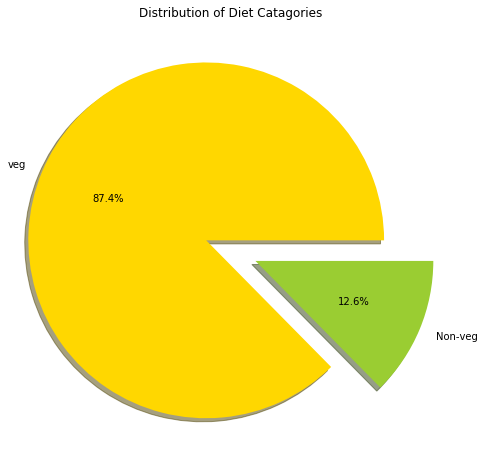

In [14]:
size_diet = [df2.diet.value_counts()[0],df2.diet.value_counts()[1]]
label_diet = ["veg", "Non-veg"]
plt.figure(figsize=(8,8))
plt.pie(size_diet, labels = label_diet, colors = ["gold", "yellowgreen"], autopct = "%1.1f%%", explode=(0,0.3),shadow=True)
plt.axis("equal")
plt.title("Distribution of Diet Catagories")

## 2. Zone wise state List 

In [15]:
df_east = df2[df2.region == "East"]
df_west = df2[df2.region == "West"]
df_north = df2[df2.region == "North"]
df_south = df2[df2.region == "South"]
df_central = df2[df2.region == "Central"]
df_ne = df2[df2.region == "North East"]
state_west = df_west.state.unique()
print("West Zone")
for i in range(len(state_west)):
    print("({}) {}".format(i + 1, state_west[i]))
print()
state_east = df_east.state.unique()
print("East Zone")
for i in range(len(state_east)):
    print("({}) {}".format(i + 1, state_east[i]))
print()
state_north = df_north.state.unique()
print("North Zone")
for i in range(len(state_north)):
    print("({}) {}".format(i + 1, state_north[i]))
print()
state_south = df_south.state.unique()
print("South Zone")
for i in range(len(state_south)):
    print("({}) {}".format(i + 1, state_south[i]))
print()
state_central = df_central.state.unique()
print("Central Zone")
for i in range(len(state_central)):
    print("({}) {}".format(i + 1, state_central[i]))
print()
state_ne = df_ne.state.unique()
print("North-East Zone")
for i in range(len(state_ne)):
    print("({}) {}".format(i + 1, state_ne[i]))

West Zone
(1) Rajasthan
(2) Maharashtra
(3) Gujarat
(4) Goa

East Zone
(1) West Bengal
(2) Odisha

North Zone
(1) Punjab
(2) Uttar Pradesh
(3) Uttarakhand
(4) Bihar
(5) NCT of Delhi
(6) Jammu & Kashmir
(7) Haryana

South Zone
(1) Andhra Pradesh
(2) Karnataka
(3) Telangana
(4) Kerala
(5) Tamil Nadu

Central Zone
(1) Chhattisgarh
(2) Madhya Pradesh

North-East Zone
(1) Assam
(2) Tripura
(3) Manipur
(4) Nagaland


## 3. Flavor Profile
* East, South, Central, North East Zone has only 2 flavor in dashes **Sweet and Spicy**. Sweet dishes are more than Spicy dishes in east zone. 71 percent sweet dishes and 29 percent spicy dishes in East zone
* West zone has 4 flavors in dishes. West Zone is famous for Indian Food because all type of flavors are there.
* North zone has 75 percent spicy, 20.8 percent sweet and 4.2 percent bitter dishes.

Text(0.5, 1.0, 'North East')

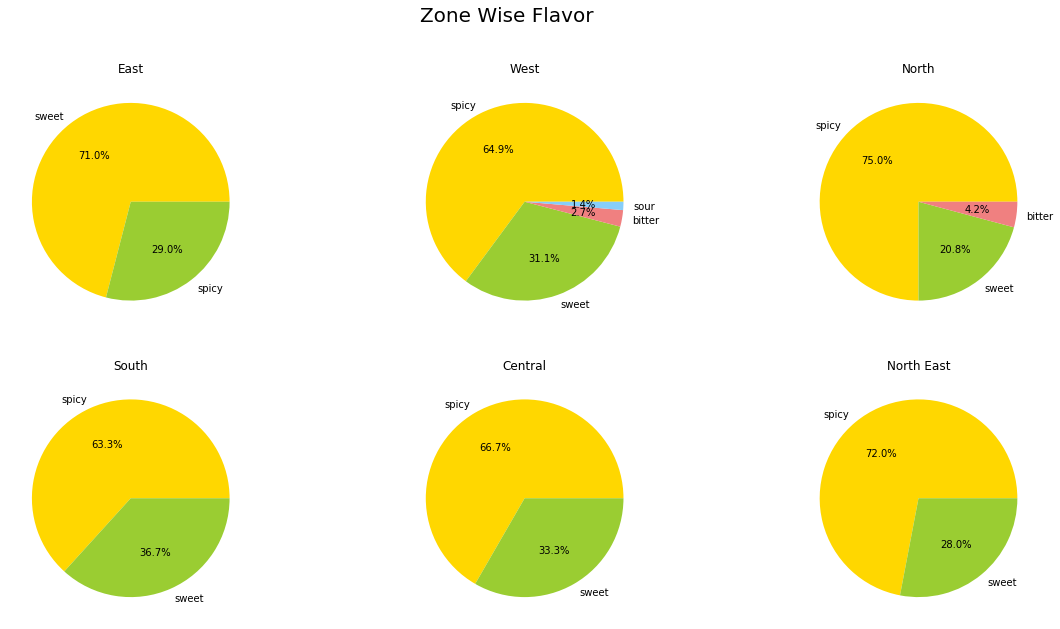

In [16]:
size_east = df_east.flavor_profile.value_counts().values
label_east = df_east.flavor_profile.value_counts().index
size_west = df_west.flavor_profile.value_counts().values
label_west = df_west.flavor_profile.value_counts().index
size_north = df_north.flavor_profile.value_counts().values
label_north = df_north.flavor_profile.value_counts().index
size_south = df_south.flavor_profile.value_counts().values
label_south = df_south.flavor_profile.value_counts().index
size_central = df_central.flavor_profile.value_counts().values
label_central = df_central.flavor_profile.value_counts().index
size_ne = df_ne.flavor_profile.value_counts().values
label_ne = df_ne.flavor_profile.value_counts().index

plt.figure(figsize=(20,10))
plt.suptitle("Zone Wise Flavor", fontsize = 20)
plt.subplot(2, 3, 1)
plt.pie(size_east, labels=label_east, autopct = "%1.1f%%",colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title("East")
plt.subplot(2, 3, 2)
plt.pie(size_west, labels=label_west, autopct = "%1.1f%%",colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title("West")
plt.subplot(2, 3, 3)
plt.pie(size_north, labels=label_north, autopct = "%1.1f%%",colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title("North")
plt.subplot(2, 3, 4)
plt.pie(size_south, labels=label_south, autopct = "%1.1f%%",colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title("South")
plt.subplot(2, 3, 5)
plt.pie(size_central, labels=label_central, autopct = "%1.1f%%",colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title("Central")
plt.subplot(2, 3, 6)
plt.pie(size_ne, labels=label_ne, autopct = "%1.1f%%",colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title("North East")


## 4. Courses and State
* **Four Different Courses are there**
    1. Starter
    2. Main Course
    3. Dessert
    4. Snack
* West zone famous for snack. aspecially,Gujarat state's has more snack dishes also Maharashtra has more dishes after Gujarat.
* East zone famous for dessert(Sweet) dishes. aspecially,West Bengal's Sweets are more famous.
* Punjab famous for main course dishes in north zone. North zone has all type of course in dishes.
* In North East zone, Assam is famous for food and main course and dessert are in this region. 
* central Zone has only three dishes in data.


Text(0.5, 1.0, 'North East')

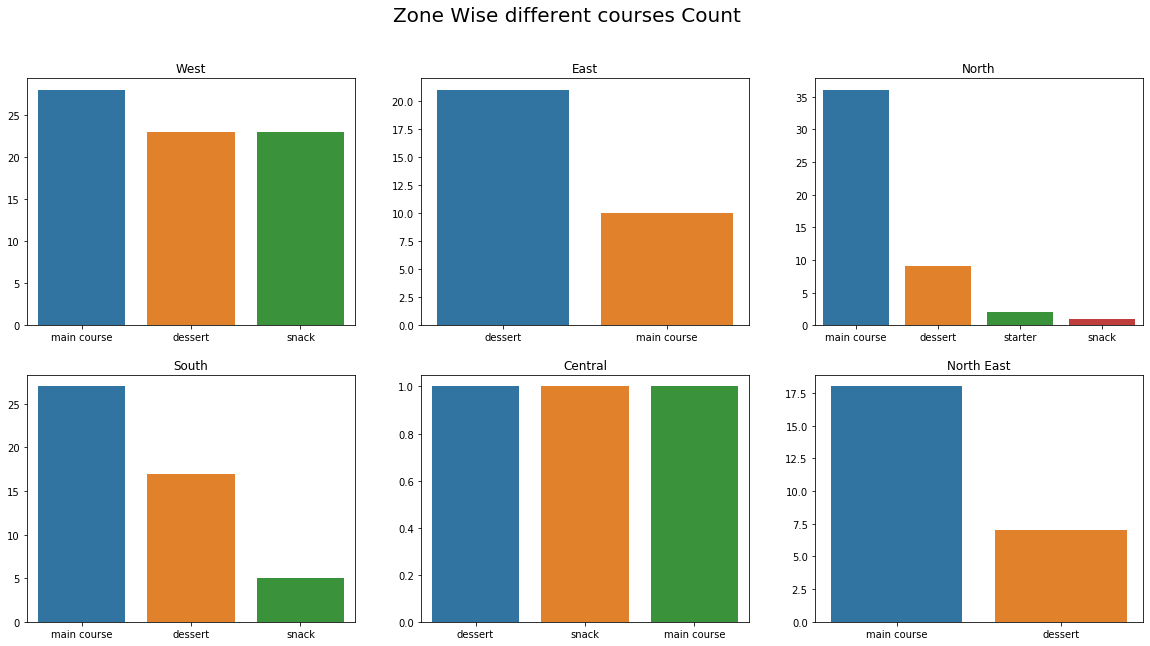

In [17]:
west_course = df_west.course.value_counts()
east_course = df_east.course.value_counts()
north_course = df_north.course.value_counts()
south_course = df_south.course.value_counts()
central_course = df_central.course.value_counts()
ne_course = df_ne.course.value_counts()
plt.figure(figsize=(20,10))
plt.suptitle("Zone Wise different courses Count", fontsize=20)
plt.subplot(2, 3, 1)
sns.barplot(west_course.index, west_course.values)
plt.title("West")
plt.subplot(2, 3, 2)
sns.barplot(east_course.index, east_course.values)
plt.title("East")
plt.subplot(2, 3, 3)
sns.barplot(north_course.index, north_course.values)
plt.title("North")
plt.subplot(2, 3, 4)
sns.barplot(south_course.index, south_course.values)
plt.title("South")
plt.subplot(2, 3, 5)
sns.barplot(central_course.index, central_course.values)
plt.title("Central")
plt.subplot(2, 3, 6)
sns.barplot(ne_course.index, ne_course.values)
plt.title("North East")

Text(0.5, 1.0, 'North-East Zone Dishes count State-vise')

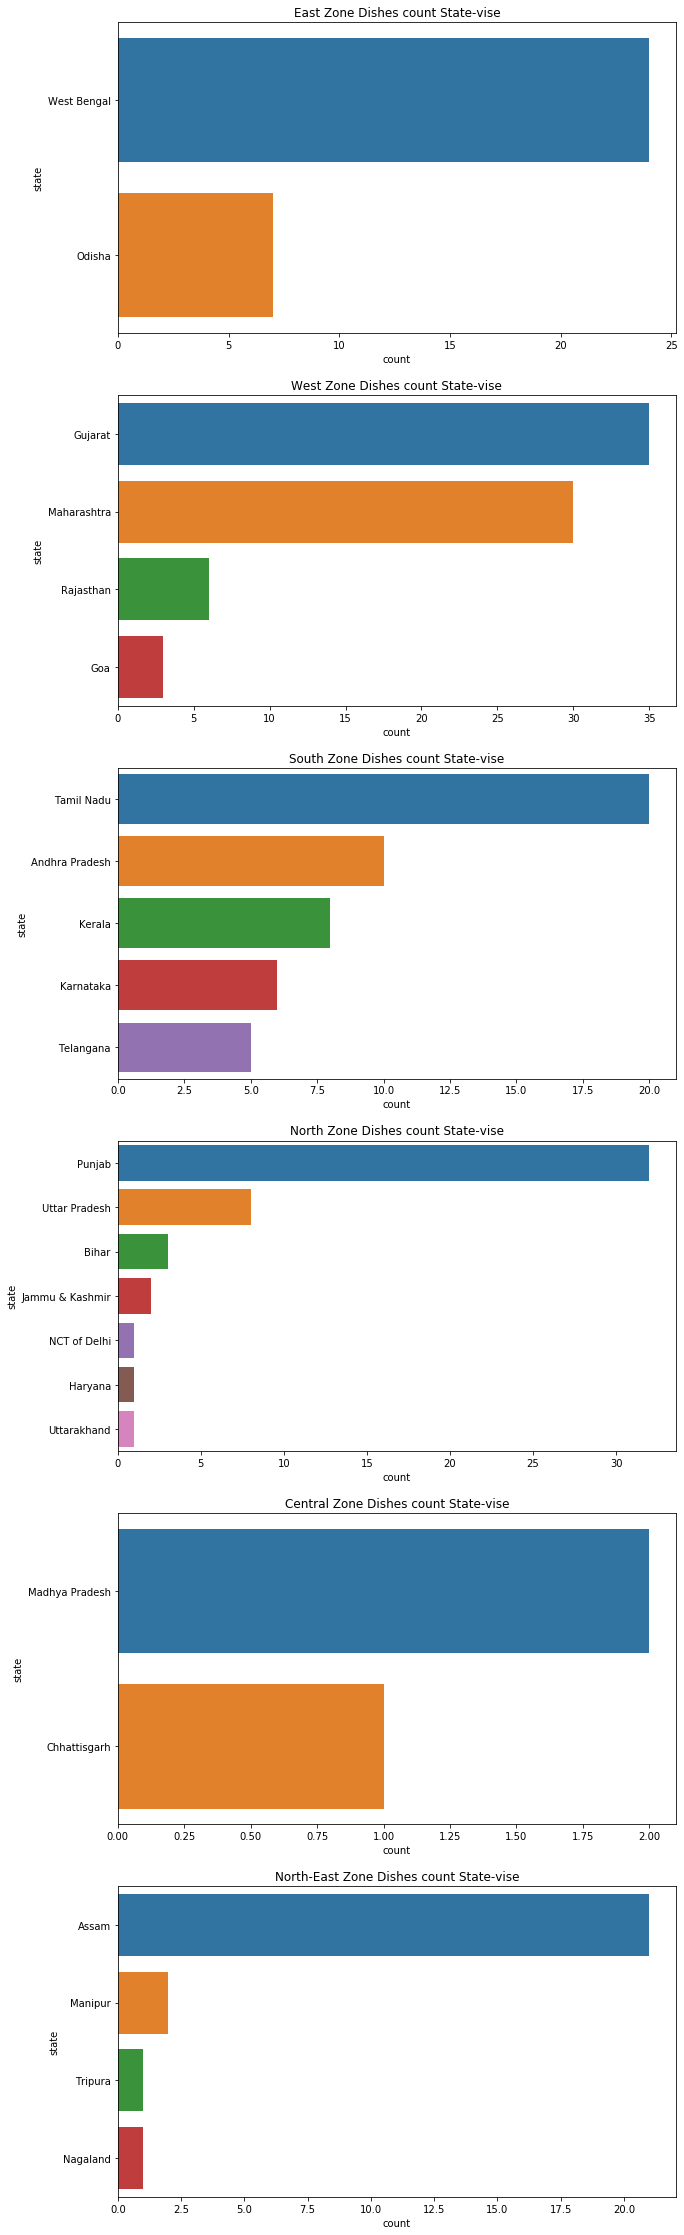

In [18]:
plt.figure(figsize=(10,40))
plt.subplot(6,1,1)
sns.countplot(y = df_east.state, order = df_east.state.value_counts().index)
plt.title("East Zone Dishes count State-vise")
plt.subplot(6,1,2)
sns.countplot(y = df_west.state, order = df_west.state.value_counts().index)
plt.title("West Zone Dishes count State-vise")
plt.subplot(6,1,3)
sns.countplot(y = df_south.state, order = df_south.state.value_counts().index)
plt.title("South Zone Dishes count State-vise")
plt.subplot(6,1,4)
sns.countplot(y = df_north.state, order = df_north.state.value_counts().index)
plt.title("North Zone Dishes count State-vise")
plt.subplot(6,1,5)
sns.countplot(y = df_central.state, order = df_central.state.value_counts().index)
plt.title("Central Zone Dishes count State-vise")
plt.subplot(6,1,6)
sns.countplot(y = df_ne.state, order = df_ne.state.value_counts().index)
plt.title("North-East Zone Dishes count State-vise")

## 5. Preparation Time and Cooking Time
* Avarage peparation time is **32 minutes**
* Average cooking time is **39 minutes**
* Highest making time(cooking time + prepration time)
    1. Attu (course : snack)
    2. Pindi chana (course : main course)
    3. Shrikhand (course : dessert)
* Minimum making time(cooking time + prepration time)
    1. Papadum (course : snack)
    2. Bajari no rotlo (course : main course)
    3. Lassi (course : dessert)

 


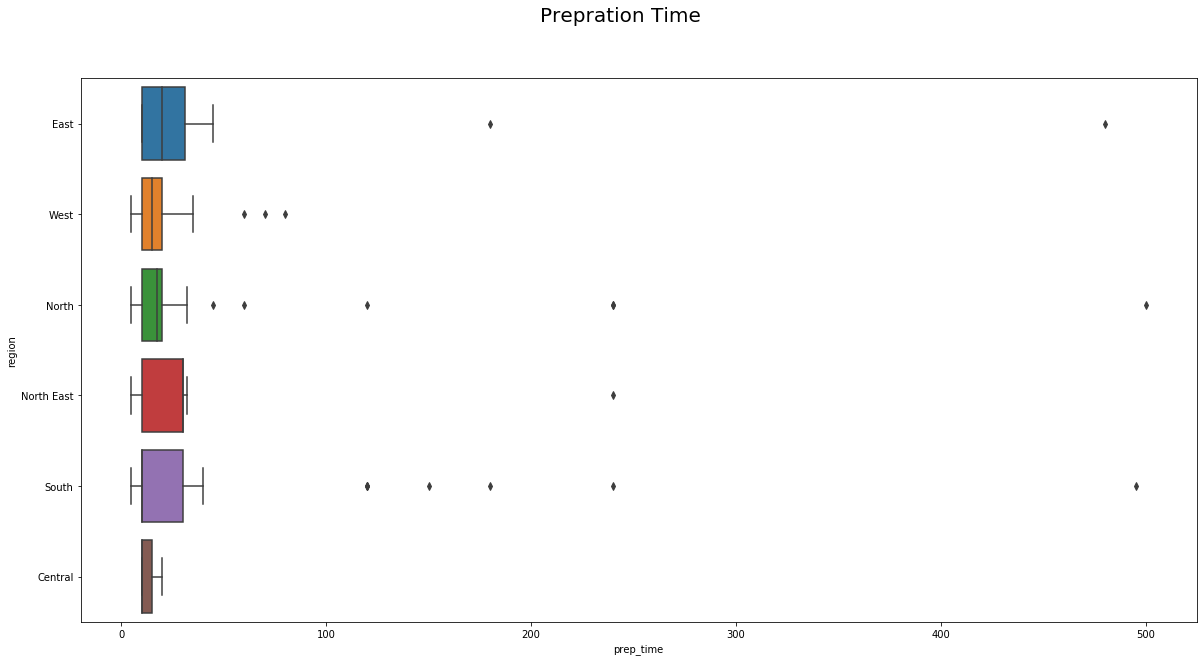

In [19]:
plt.figure(figsize=(20,10))
plt.suptitle("Prepration Time", fontsize = 20)
sns.boxplot(y = df2.region, x = df2.prep_time)

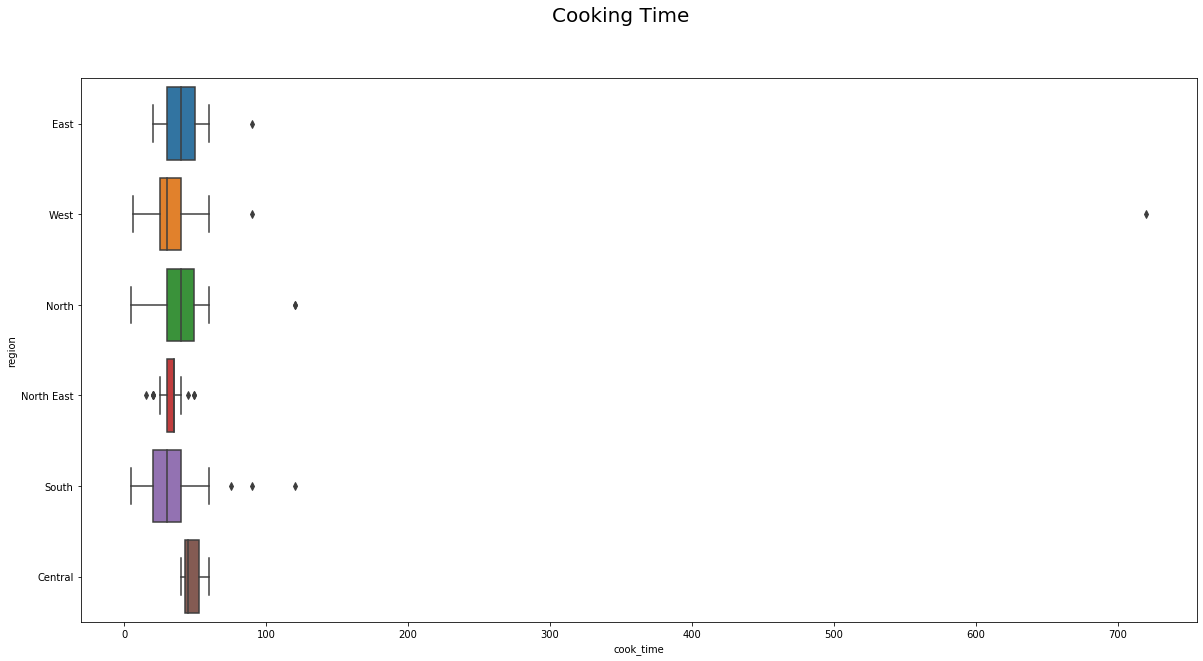

In [20]:
plt.figure(figsize=(20,10))
plt.suptitle("Cooking Time", fontsize = 20)
sns.boxplot(y = df2.region, x = df2.cook_time)

Text(0.5, 1.0, 'Top-5 Snack-Dishes of More Making Time(Prepration_time + Cooking_time)')

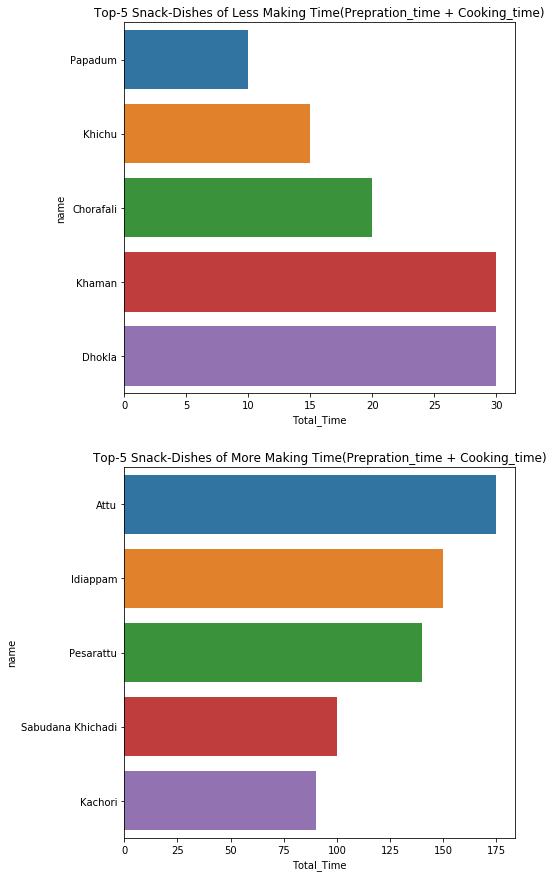

In [21]:
top_snack = df2[df2.course == "snack"].sort_values('Total_Time')[:5]
down_snack = df2[df2.course == "snack"].sort_values('Total_Time', ascending = 0)[:5]
top_main = df2[df2.course == "main course"].sort_values('Total_Time')[:5]
down_main = df2[df2.course == "main course"].sort_values('Total_Time', ascending = 0)[:5]
top_starter = df2[df2.course == "starter"].sort_values('Total_Time')[:5]
down_starter = df2[df2.course == "starter"].sort_values('Total_Time', ascending = 0)[:5]
top_dessert = df2[df2.course == "dessert"].sort_values('Total_Time')[:5]
down_dessert = df2[df2.course == "dessert"].sort_values('Total_Time', ascending = 0)[:5]

plt.figure(figsize=(7,15))
plt.subplot(2,1,1)
sns.barplot(y = top_snack.name, x = top_snack.Total_Time)
plt.title("Top-5 Snack-Dishes of Less Making Time(Prepration_time + Cooking_time)")
plt.subplot(2,1,2)
sns.barplot(y = down_snack.name, x = down_snack.Total_Time)
plt.title("Top-5 Snack-Dishes of More Making Time(Prepration_time + Cooking_time)")

### ii. Main Course

Text(0.5, 1.0, 'Top-5 Main Course-Dishes of More Making Time(Prepration_time + Cooking_time)')

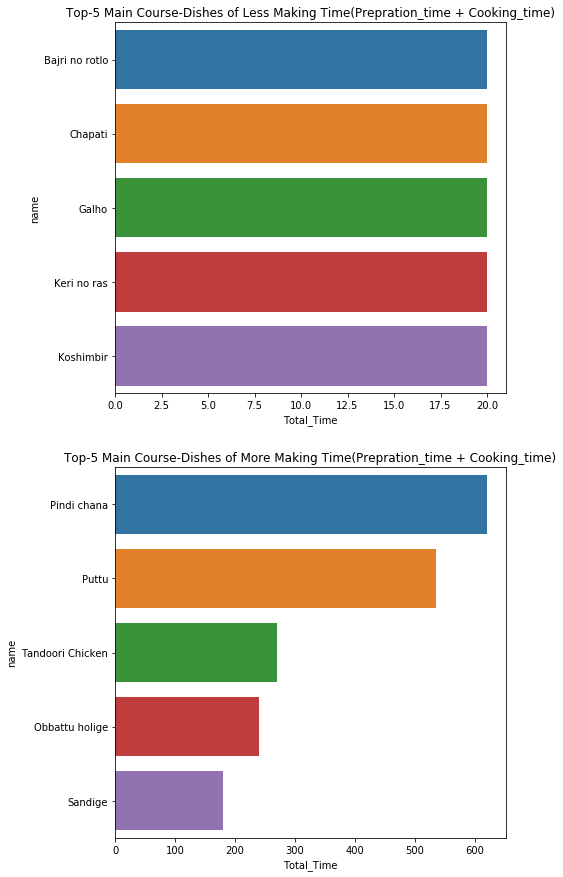

In [22]:
plt.figure(figsize=(7,15))
plt.subplot(2,1,1)
sns.barplot(y = top_main.name, x = top_main.Total_Time)
plt.title("Top-5 Main Course-Dishes of Less Making Time(Prepration_time + Cooking_time)")
plt.subplot(2,1,2)
sns.barplot(y = down_main.name, x = down_main.Total_Time)
plt.title("Top-5 Main Course-Dishes of More Making Time(Prepration_time + Cooking_time)")

### iii. Dessert Dishes

Text(0.5, 1.0, 'Top-5 Dessert-Dishes of More Making Time(Prepration_time + Cooking_time)')

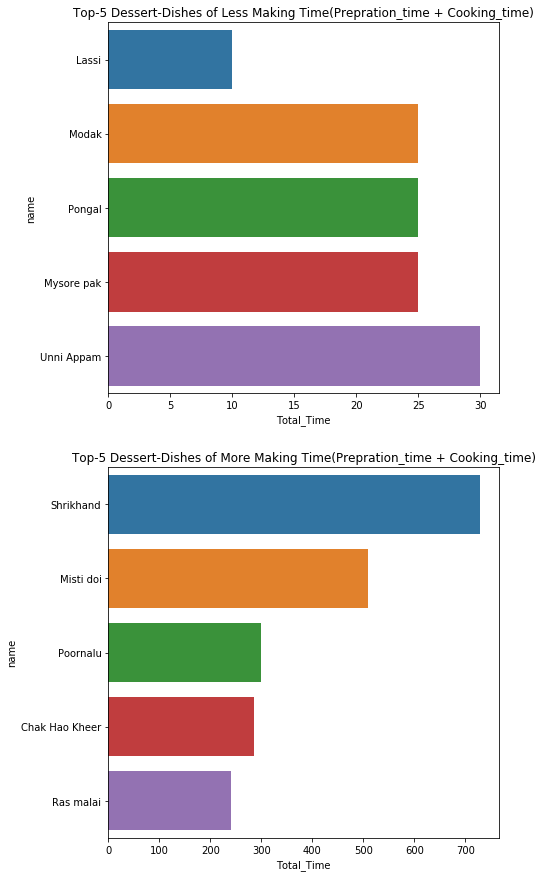

In [23]:
plt.figure(figsize=(7,15))
plt.subplot(2,1,1)
sns.barplot(y = top_dessert.name, x = top_dessert.Total_Time)
plt.title("Top-5 Dessert-Dishes of Less Making Time(Prepration_time + Cooking_time)")
plt.subplot(2,1,2)
sns.barplot(y = down_dessert.name, x = down_dessert.Total_Time)
plt.title("Top-5 Dessert-Dishes of More Making Time(Prepration_time + Cooking_time)")

## 6. Ingradiants
* Maximun 10 ingradiants use for dishes and Minimum 2 ingradiants use.
* 5 ingradiants use for most of dishes.

Text(0, 0.5, 'No.of Dishes')

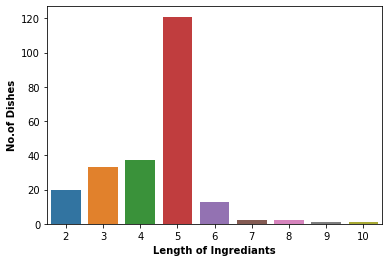

In [24]:
sns.countplot(df3.len_ingediant)
plt.xlabel("Length of Ingrediants", Weight = "bold")
plt.ylabel("No.of Dishes", Weight = "bold")
    